In [33]:
# ***** 파싱:
# BeatuifulSoup 객체를 생성하려면 HTML 또는 XML 문자열과
# 파서를 전달해야 합니다. 일반적으로 'html.parser'를 사용합니다.

# 사이트 url을 변수에 담아서 선언
# 사이트 주소를 요청하는 라이브러리

# 1. 라이브러리 호출
import urllib.request as req
from bs4 import BeautifulSoup

# 2. 원하는 url 주소 담아서 열리는지 확인
url = "https://media.daum.net/"
# 위 주소를 열어봐서 잘 열리는 경우에만 정보 열람
res = req.urlopen(url)
source = res.read()

# 3. 한글깨짐 방지
# 한글을 지원하는 유니코드입니다. (한글깨짐 방지)
source = source.decode('utf-8')

# 4. 데이터 해석 (parsing)
# BeautifulSoup 에서 본 사이트는 html 문서라는 것을 알려줌
html = BeautifulSoup(source, 'html.parser')
# ***파악한 패턴을 적용하여 원하는 정보를 atags 변수에 저장 합니다.
atags = html.select('a[class=link_txt]')
# print(atags)
# print(len(atags))

# 뉴스 내용만 수집하려면?
# result_data 변수에 빈 리스트 자료구조를 선언 (뉴스 헤드라인 데이터만 담을라고)
result_data = []

cnt = 0 # 총 뉴스 헤드라인의 개수도 세고싶어서 cnt 변수 선언
# 크롤링한 전체 데이터에서 개별 데이터 호출
# for문으로 크롤링 데이터 셋에서 개별문장 하나씩 호출
for ii in atags:
    cnt += 1
    # 데이터를 문자열로 변환 ( 전체 문장에서 문자열 데이터만 추출함 )
    atag_str = str(ii.string)
    # 걸러진 문자열 데이터를 준비한 리스트 자료구조에 담습니다.
    result_data.append(atag_str.strip()) # 문장좌우에 불필요한 여백은 strip으로 제거

print(result_data)


["의료공백 미봉책 언제까지… 간호사 '불만'에 환자는 '우려'", 'GTX-B 노선 본격 궤도…정부, 올해 15.7조원 규모 민자사업 발굴한다', '"취업? 난 사장 할래"…편의점 점주 10명 중 4명은 2030세대 [뉴블더]', '"위상 낮아진 통신사 … 글로벌 동맹으로 AI시대 주역될것"', '"밸류업 실망 이르다"… 2차 가치주場 오나', '스마트폰 이젠 운동할땐 손목에 차고, 음성으로 티켓 예약까지', '동네마다 보건소 있듯… 화성시·서울시 ‘공공형 반려동물병원 사업’ 시행 [멍멍냥냥]', '삼성·마이크론, 앞다퉈 ‘5세대 HBM’ 발표…SK하이닉스 위협', '대기업 월 591만원-중소기업 286만원…임금 늘어도 격차 여전', "임종석 컷오프·고민정 사퇴…민주, '심리적 분당' 사태", '“불법이민 대응, 표심 가른다”···바이든·트럼프 29일 텍사스서 ‘국경 혈투’ [Global What]', '"韓 저출생 극복하려면 대기업 일자리 더 늘려야"', '장내 세균 눈으로 이동하면 실명 위험 높아진다', "황선홍, 축구대표 '임시 감독' 선임…태국과 2연전 지휘", '[총선현장]인재근 “안귀령, 젊고 여성이라 좋아요. 끝!”', '“가격 치솟는 5월 전에 실컷 먹자”…돼지고기 가격, 5개월 연속 하락', "최후통첩 아랑곳없는 전공의… 정부 '새 명령'은 통할까", '천정부지 치솟는 日증시…닛케이 장중 3만9400 첫 돌파', '中, 국가기밀법 개정안 통과…안보 강화에 짐싸는 외국기업', '양산시 동부 유일 24시간 응급실 갖춘 웅상중앙병원 폐업 결정', '"취업? 난 사장 할래"…편의점 점주 10명 중 4명은 2030세대 [뉴블더]', '(영상) 이스라엘, 레바논 도로 달리던 차량에 공습…헤즈볼라 사령관 사살 [포착]', '[생생플러스] "소상공인 고효율 냉장고·난방기 구매시  40% 지원"', '고전하는 우크라 \'병력\' 지원받나...러 "파병 시 나토와 충돌" [Y녹취록]', '‘과당 경쟁’ 부작용 현실로…운전자보험 유지율 결국 반토막[머니뭐니]',

In [34]:
# 텍스트 전처리
# 뉴스 데이터 자체는 불필용한 특수 기호, 따옴표, 부적절한 띄어쓰기 등으로
# 자연어 데이터가 일관성이 떨어진다.
# 즉, 단어를 세서 키워드 분석 등의 자연어 처리 작업이 불가 하므로
# 문자데이터를 전처리하여 데이터 클리닝을 진행하여야 한다.

# 텍스트 전처리 순서
# 1. 텍스트 전처리 관련 (정규 표현식) 라이브러리 호출
import re

# 2. 텍스트 전처리 함수 만들기
# 함수에서 입력값을 받아서 처리하겠다는 의미로 괄호안에 input_data라는 변수 선언
def clean_text(ㅋㅋㅋ):
    # 문장부호 제거기능 추가 sub라는 명령어는 교체한다는 의미
    text_string_re1 = re.sub('[,.?!:\'\";]', '', ㅋㅋㅋ)
    # 특수문자 제거기능 추가
    text_string_re2 = re.sub('[!@#$%^&*()]|[0-9]', '', text_string_re1)
    # 영문 대,소문자 --> 영문 소문자로 통일 ( 소문자 변환 lower 함수 사용)
    text_string_re3 = text_string_re2.lower()
    # 통일된 영문 데이터를 없애기
    text_string_re4 = re.sub('[a-z]', '', text_string_re3)
    # 불필요한 공백 제거 (split 함수 통해서 단어마다 별도의 데이터로 인식 후, 불필요한 여백제거)
    text_string_re5 = ' '.join(text_string_re4.split())
    return text_string_re5

# 텍스트 함수 사용
# 전처리 후 깨끗해진 단어 데이터를 넣을 리스트 자료형 데이터셋을 선언합니다.

clean_text2 = []
clean_text3 = ""
# 이전의 결과 셋에서 개별 데이터를 호출해서 clean_text함수에 넣고 데이터 전처리
for jj in result_data:
    clean_text2.append(clean_text(jj))
    clean_text3 += (clean_text(jj) + "\n")

# clean_text2 = [ clean_text(jj) for jj in result_data ] // 리스트 컴프리헨션

print("저희 결과는")
print(clean_text2)
print(clean_text3)

# clean_text2 관련 for문을 리스트 컴프리헨션. 즉, 1줄짜리 리스트 안 for문으로 변환해보세요.

저희 결과는
['의료공백 미봉책 언제까지… 간호사 불만에 환자는 우려', '- 노선 본격 궤도…정부 올해 조원 규모 민자사업 발굴한다', '취업 난 사장 할래…편의점 점주 명 중 명은 세대 [뉴블더]', '위상 낮아진 통신사 … 글로벌 동맹으로 시대 주역될것', '밸류업 실망 이르다… 차 가치주場 오나', '스마트폰 이젠 운동할땐 손목에 차고 음성으로 티켓 예약까지', '동네마다 보건소 있듯… 화성시·서울시 ‘공공형 반려동물병원 사업’ 시행 [멍멍냥냥]', '삼성·마이크론 앞다퉈 ‘세대 ’ 발표…하이닉스 위협', '대기업 월 만원-중소기업 만원…임금 늘어도 격차 여전', '임종석 컷오프·고민정 사퇴…민주 심리적 분당 사태', '“불법이민 대응 표심 가른다”···바이든·트럼프 일 텍사스서 ‘국경 혈투’ [ ]', '韓 저출생 극복하려면 대기업 일자리 더 늘려야', '장내 세균 눈으로 이동하면 실명 위험 높아진다', '황선홍 축구대표 임시 감독 선임…태국과 연전 지휘', '[총선현장]인재근 “안귀령 젊고 여성이라 좋아요 끝”', '“가격 치솟는 월 전에 실컷 먹자”…돼지고기 가격 개월 연속 하락', '최후통첩 아랑곳없는 전공의… 정부 새 명령은 통할까', '천정부지 치솟는 日증시…닛케이 장중 만 첫 돌파', '中 국가기밀법 개정안 통과…안보 강화에 짐싸는 외국기업', '양산시 동부 유일 시간 응급실 갖춘 웅상중앙병원 폐업 결정', '취업 난 사장 할래…편의점 점주 명 중 명은 세대 [뉴블더]', '영상 이스라엘 레바논 도로 달리던 차량에 공습…헤즈볼라 사령관 사살 [포착]', '[생생플러스] 소상공인 고효율 냉장고·난방기 구매시 지원', '고전하는 우크라 병력 지원받나러 파병 시 나토와 충돌 [녹취록]', '‘과당 경쟁’ 부작용 현실로…운전자보험 유지율 결국 반토막[머니뭐니]', '[뉴스큐] 나토 일부국 우크라에 병력 투입 첫 시사포탄 해외 구매에도 박차', '기업 ‘자율’에 맡긴 ‘밸류업’…기업이 당장 할 수 있는 이것부터 [투자뉴스 뒤풀이]', '[이런 여행]

In [35]:
# 단어 빈도파악 (단어 수 세기)

# 단어 수 셀 때 딕셔너리 자료구조가 필요하다.
# 왜? key와 value로 단어와 단어 개수를 표시해야 하므로

word_count = {}

#단어 수 셀 때 주의사항 : 
# 각 문장안에 단어가 있으므로 2중 for문 구조가 필요
# 바깥 for문이 개별 문장이고,
# 안쪽 for문이 그 문장 안에 단어이다.

# 전처리 데이터셋에서 text라는 이름으로 문장 하나씩 끄집어 냄
for text in clean_text2:
    # 끄집어낸 문장에서 단어 하나씩 추출
    # split 함수가 없으면 단어의 글자로 전부 세버린다. split을 써야 문장 안에서 단어로 인식 가능
    for word in text.split():
        # 딕셔너리 잘구조에서 단어를 key값으로 놓고
        # get 함수를 이용해서 같은 데이터가 들어올 때마다 1씩 증가
        word_count[word] = word_count.get(word, 0) + 1

print(word_count)

{'의료공백': 1, '미봉책': 1, '언제까지…': 1, '간호사': 1, '불만에': 1, '환자는': 1, '우려': 1, '-': 1, '노선': 1, '본격': 1, '궤도…정부': 1, '올해': 1, '조원': 1, '규모': 1, '민자사업': 1, '발굴한다': 1, '취업': 2, '난': 2, '사장': 2, '할래…편의점': 2, '점주': 2, '명': 2, '중': 2, '명은': 2, '세대': 2, '[뉴블더]': 2, '위상': 1, '낮아진': 1, '통신사': 1, '…': 1, '글로벌': 1, '동맹으로': 1, '시대': 1, '주역될것': 1, '밸류업': 1, '실망': 1, '이르다…': 1, '차': 1, '가치주場': 1, '오나': 1, '스마트폰': 1, '이젠': 1, '운동할땐': 1, '손목에': 1, '차고': 1, '음성으로': 1, '티켓': 1, '예약까지': 1, '동네마다': 1, '보건소': 1, '있듯…': 1, '화성시·서울시': 1, '‘공공형': 1, '반려동물병원': 1, '사업’': 1, '시행': 1, '[멍멍냥냥]': 1, '삼성·마이크론': 1, '앞다퉈': 1, '‘세대': 1, '’': 1, '발표…하이닉스': 1, '위협': 1, '대기업': 2, '월': 2, '만원-중소기업': 1, '만원…임금': 1, '늘어도': 1, '격차': 1, '여전': 1, '임종석': 1, '컷오프·고민정': 1, '사퇴…민주': 1, '심리적': 1, '분당': 1, '사태': 1, '“불법이민': 1, '대응': 1, '표심': 1, '가른다”···바이든·트럼프': 1, '일': 1, '텍사스서': 1, '‘국경': 1, '혈투’': 1, '[': 1, ']': 1, '韓': 1, '저출생': 1, '극복하려면': 1, '일자리': 1, '더': 1, '늘려야': 1, '장내': 1, '세균': 1, '눈으로': 1, '이동하면': 1, '실명': 1, '위험': 1, '높아진다'

In [36]:
# 단어 전처리 (글자에 의미부여)
# 2회이상 출현 단어 + 2~4 단어만 선정

new_word_count = {}
# 딕셔너리 구조의 items 함수 이용해서 단어의 빈도수와 단어정보를
# 동시에 접근하였고 개별 원소에서 변수 2개 설정(word, cnt)
for word, cnt in word_count.items():
    # 3회 이상 출현 & 단어 글자 수 2~4글자 사이
    if cnt >= 2 and len(word) >= 2 and len(word) <= 4:
        print(word, "->", word_count[word])
        new_word_count[word] = new_word_count.get(word, cnt)

print(new_word_count)


취업 -> 2
사장 -> 2
점주 -> 2
명은 -> 2
세대 -> 2
대기업 -> 2
치솟는 -> 2
병력 -> 2
{'취업': 2, '사장': 2, '점주': 2, '명은': 2, '세대': 2, '대기업': 2, '치솟는': 2, '병력': 2}


In [37]:
# 통계자료 작성

from collections import Counter
# 상위 몇위 등의 통계를 만드는 Counter 라는 라이브러리에 데이터 입력
count_result = Counter(new_word_count)
# 단어 빈도 수 기준, 상위 5단어를 뽑아서 top5_word 변수에 저장
top5_word = count_result.most_common(5)
print(top5_word)


[('취업', 2), ('사장', 2), ('점주', 2), ('명은', 2), ('세대', 2)]


['취업', '사장', '점주', '명은', '세대'] [2, 2, 2, 2, 2]


C:\Users\EZEN-14\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EZEN-14\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EZEN-14\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EZEN-14\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EZEN-14\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYL

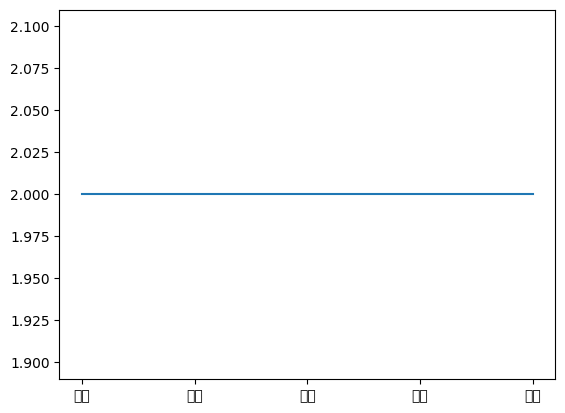

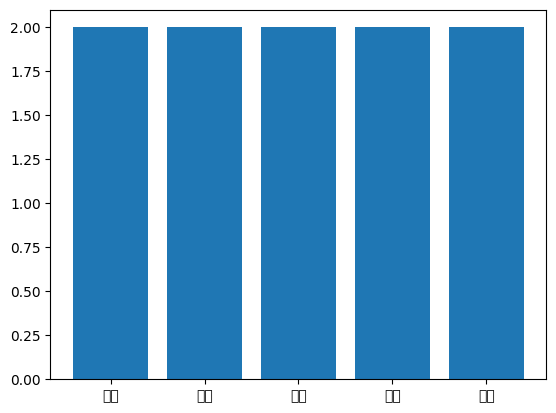

In [38]:
# 그래프 그려보기
# 그래프는 데이터 (x축) 결과값 (y축)으로 되어 있습니다.
# 그래서 단어와 빈도수를 쪼개서 별도의 데이터로 저장해야합니다.

# 그래프의 x축은 키워드, y축은 키워드의 빈도수
words = []
counts = []

for word, count in top5_word:
    words.append(word)
    counts.append(count)

print(words, counts)

import matplotlib.pyplot as plt

# 선그래프 그리기
plt.plot(words, counts)
plt.show()

# 막대그래프 그리기
plt.bar(words, counts)
plt.show()

In [56]:
# 다음영화 포스터 이미지 크롤링 하기 2015 ~ 2019
# 필요한 라이브러리 호출
# import requests
# from bs4 import BeautifulSoup
# 영화 포스터 이미지 데이터셋 종류
# import base64

# (내가 노가다 시) 업무 순서
# 1. 검색창에 가서 연도별로 '20xx년 영화순위' 라고 입력한다.
# 2. 스샷들이 보이면 마우스 우클릭
# 3. 우클릭 하여 저장한 이미지 파일에 연도와 순위로 파일 이름 지어주기

# year_data = [2015, 2016, 2017, 2018, 2019]
# range 함수를 응용하여 각 연도별로 검색어를 처리하려고 합니다.

# ---------------------------------------------------------------- 

# for year in range(2015, 2020):
#     # 해당 연도를 이용해서 다음검색 페이지의 url을 만듭니다.
#     # 문자열 데이터 처리의 응용
#     url = "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84".format(year)
#     res = requests.get(url)
#     # 요청이 실패할 경우 프로그램 중단
#     res.raise_for_status()
#     # 요청한 페이지의 html 내용을 BeautifulSoup로 파싱합니다.
#     soup = BeautifulSoup(res.text, "lxml")
#     # thumb_img 클래스를 가진 모든 이미지 요소를 찾습니다.
#     images = soup.find_all("img", attrs={"class":"thumb_img"})
#     # 찾은 이미지 요소들에 대해 반복합니다 (1~5위까지)
#     for idx, image in enumerate(images):
#         # 개별 이미지의 url을 추출합니다.
#         image_url = image["src"]

#         # 이미지의 url이 "data:image" 로 시작하는 경우, base64를 써서 파일로 저장
#         if image_url.startswith(""):
#             image_data = image_url.split(",")[1]
#             # 파일로 저장 할 때, 파일이름을 지정해 줍니다.
#             with open("movie_{}_{}.jpg".format(year, idx+1), "wb") as f:
#                 f.write(base64.b64decode(image_data))
        
#         else:
#             # 이미지 url이 "//"로 시작하는 경우,
#             # "https:"를 추가하여 완전한 url을 만듭니다.
#             if image_url.startswith("//"):
#                 image_url = "https://" + image_url

#         print(image_url)

# ---------------------------------------------------------------- 

Screenshot saved: screenshot_2015_100.png
Screenshot saved: screenshot_2015_101.png
Screenshot saved: screenshot_2015_102.png
Screenshot saved: screenshot_2015_103.png
Screenshot saved: screenshot_2015_104.png


In [58]:
# import requests
# from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# (내가 노가다 시) 업무 순서
# 1. 검색창에 가서 연도별로 '20xx년 영화순위' 라고 입력한다.
# 2. 스샷들이 보이면 마우스 우클릭
# 3. 우클릭 하여 저장한 이미지 파일에 연도와 순위로 파일 이름 지어주기

# 주기적으로 웹사이트 구조가 바뀌므로 크롤링은 같은 구조로 되지 않는다.
# 각 연도의 상위 5위 이므로 2중 for문을 고생각해 낼 수 있다.
# 바깥 for문은 각 연도별 영화검색어
# 안쪽 for문은 1~5위 까지 5개의 영화 썸네일
# 문자열 데이터 처리의 응용도 2번 들어감 (url 입력 & 썸네일 파일 이름짓기)

# 2015년부터 2019년까지의 각 연도에 대해 반복합니다.
for year in range(2015, 2020):

# 해당 연도를 이용하여 다음(Daum) 검색 페이지의 URL을 생성합니다.
    url = "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84".format(year)

    # beautifulSoup말고 Selenium을 사용합니다.
    # Selenium을 사용하여 웹사이트 창을 띄웁니다.
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    # 구글 크롬을 엽니다.  
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)
    # selenium은 사용법이 살짝 다르다.
    #  CSS_SELECTOR 기준, "thumb_img" 로 이미지 파일을 검색합니다. (사용법 차이)
    images = driver.find_elements(By.CSS_SELECTOR, "img.thumb_img")

    # for문을 사용해서 아까와 동일하게 파일 이름을 정합니다.
    for idx, image in enumerate(images):
        # 연도와 순위를 개별 이미지 파일에 저장합니다.
        screenshot_filename = "screenshot_{}_{}.png".format(year, idx + 1)
        image.screenshot(screenshot_filename)
        print("이미지 파일 저장완료:", screenshot_filename)
        
        # 상위 5개 이미지만 다운로드하고 반복을 종료합니다.
        if idx >= 4:
            break

이미지 파일 저장완료: screenshot_2015_1.png
이미지 파일 저장완료: screenshot_2015_2.png
이미지 파일 저장완료: screenshot_2015_3.png
이미지 파일 저장완료: screenshot_2015_4.png
이미지 파일 저장완료: screenshot_2015_5.png
이미지 파일 저장완료: screenshot_2016_1.png
이미지 파일 저장완료: screenshot_2016_2.png
이미지 파일 저장완료: screenshot_2016_3.png
이미지 파일 저장완료: screenshot_2016_4.png
이미지 파일 저장완료: screenshot_2016_5.png
이미지 파일 저장완료: screenshot_2017_1.png
이미지 파일 저장완료: screenshot_2017_2.png
이미지 파일 저장완료: screenshot_2017_3.png
이미지 파일 저장완료: screenshot_2017_4.png
이미지 파일 저장완료: screenshot_2017_5.png
이미지 파일 저장완료: screenshot_2018_1.png
이미지 파일 저장완료: screenshot_2018_2.png
이미지 파일 저장완료: screenshot_2018_3.png
이미지 파일 저장완료: screenshot_2018_4.png
이미지 파일 저장완료: screenshot_2018_5.png
이미지 파일 저장완료: screenshot_2019_1.png
이미지 파일 저장완료: screenshot_2019_2.png
이미지 파일 저장완료: screenshot_2019_3.png
이미지 파일 저장완료: screenshot_2019_4.png
이미지 파일 저장완료: screenshot_2019_5.png
